In [377]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.decomposition import LatentDirichletAllocation

import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import matplotlib.pyplot as plt

import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [378]:

eng_stopwords = set(stopwords.words("english"))
my_stopwords = eng_stopwords.union(
    [
        "ect",
        "hou",
        "com",
        "http",
        "www",
        "recipient",
        "sent",
        "enron",
        "cc",
        "subject",
        "forwarded",
        "corp",
        "said",
        "attached",
        "recipient",
        "email",
        "original",
        "doc",
        "pm",
        "mail",
        "message",
        "new" "enronxgate",
        "na",
        "year",
        "please",
    ]
)


# Load data

In [379]:
emails_df = pd.read_csv("data/v3.csv").sample(1000)
emails_df = emails_df.set_index("id_mail")
emails_df["date"] = pd.to_datetime(emails_df["date"], infer_datetime_format=True)
print(emails_df.shape)
emails_df.head(1)


(1000, 7)


,date,from,to,subject,body,x_origin,body_clean
id_mail,,,,,,,
<2273580.1075844046543.JavaMail.evans@thyme>,2000-12-13 05:02:00-08:00,lorna.brennan@enron.com,"rockey.storie@enron.com, kent.miller@enron.com...",NGI to Post Electronic Platform Deal Index eac...,"from NGI's Daily Gas Price Index Dec 13, 2000 ...",LOKAY-M,"['daily', 'price', 'index', 'attempt', 'captur..."


In [380]:
analysis_df = emails_df[["from", "to", "date", "body"]].dropna().copy()

## Token

In [381]:
def clean(text):
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    porter= PorterStemmer()
    
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in my_stopwords) and (not i.isdigit()))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    return normalized

In [407]:
text_clean = []
for text in analysis_df["body"]:
    text_clean.append(clean(text).split())

## doc_matrix

In [408]:
dictionary = corpora.Dictionary(text_clean)
text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

## LDA


In [409]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(text_term_matrix, num_topics=5, id2word=dictionary, passes=30, per_word_topics=True)


# inspect LDA model


In [410]:
for topic in ldamodel.show_topics():
    print(f"{topic[0]}: {topic[1]}\n\n")

0: 0.008*"deal" + 0.005*"day" + 0.005*"aol" + 0.005*"know" + 0.004*"get" + 0.004*"type" + 0.004*"schedule" + 0.004*"id" + 0.003*"new" + 0.003*"one"


1: 0.007*"ee" + 0.007*"thanks" + 0.006*"development" + 0.006*"contract" + 0.006*"agreement" + 0.006*"would" + 0.006*"know" + 0.005*"need" + 0.005*"let" + 0.004*"gas"


2: 0.014*"price" + 0.010*"e" + 0.009*"market" + 0.007*"power" + 0.007*"energy" + 0.007*"california" + 0.006*"per" + 0.005*"would" + 0.005*"gas" + 0.005*"state"


3: 0.010*"de" + 0.010*"e" + 0.009*"le" + 0.007*"l" + 0.005*"r" + 0.005*"la" + 0.004*"et" + 0.004*"enronxgate" + 0.004*"trading" + 0.004*"ca"


4: 0.008*"company" + 0.007*"million" + 0.006*"service" + 0.005*"new" + 0.004*"venture" + 0.004*"round" + 0.004*"market" + 0.004*"fund" + 0.003*"firm" + 0.003*"capital"




In [362]:
print(ldamodel.num_topics)

5


In [363]:
ldamodel.get_topics()

array([[2.2573911e-05, 3.9275739e-04, 1.1773097e-04, ..., 6.5023755e-06,
        6.5023860e-06, 3.8837101e-05],
       [4.9997517e-04, 8.0585465e-05, 3.5031547e-04, ..., 3.8428716e-05,
        3.8428603e-05, 6.4382734e-06],
       [6.7497563e-04, 2.5380804e-04, 1.0379264e-05, ..., 5.8300161e-06,
        5.8300179e-06, 5.8300343e-06],
       [6.5836078e-04, 1.8415575e-04, 1.3517703e-04, ..., 4.7632102e-06,
        4.7632711e-06, 4.7630901e-06],
       [5.5737506e-05, 2.5739547e-04, 6.9950307e-05, ..., 5.7506104e-06,
        5.7506118e-06, 5.7506195e-06]], dtype=float32)

# pyViz

In [432]:

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(4))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(ldamodel, text_term_matrix, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(4) +'.html')
LDAvis_prepared

/Users/hsinhan/PycharmProjects/Enron_Email_Usecase/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.017543 -0.067507       1        1  37.464058
4      0.098835  0.132937       2        1  20.791424
2      0.078625 -0.026218       3        1  15.730808
3     -0.178107  0.065477       4        1  14.507751
0     -0.016896 -0.104690       5        1  11.505958, topic_info=             Term        Freq       Total Category  logprob  loglift
50          price  400.000000  400.000000  Default  30.0000  30.0000
2287           de  197.000000  197.000000  Default  29.0000  29.0000
1104           le  194.000000  194.000000  Default  28.0000  28.0000
18           deal  255.000000  255.000000  Default  27.0000  27.0000
2591      million  200.000000  200.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
712          week   33.644710  211.589647   Topic5  -6.0164   0.3235
607          last   32.006006  172.351330   Topic5  -6.0663   0.4787
33    information   33.720349  263.592223   Topic5  -6.0141   0.1060
167             u   33.986821  313.157031   Topic5  -6.0062  -0.0584
128           let   32.682093  276.625348   Topic5  -6.0454   0.0265

[383 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
5754       3  0.937122     acteva
10283      3  0.977544        aes
5733       5  0.946286        aga
506        1  0.900189  agreement
506        2  0.049422  agreement
...      ...       ...        ...
497        3  0.214700      would
497        4  0.020556      would
497        5  0.095930      would
565        1  0.963795        wpd
4989       5  0.913956      zimin

[873 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

# >>>>>>>>>>>>>>>>IGNORE


In [423]:
print(ldamodel.get_term_topics("hello", minimum_probability=0.000001))

[(0, 0.0003624536), (1, 0.00011808245), (2, 4.822282e-05), (3, 9.845141e-05), (4, 2.6838174e-05)]


In [277]:
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    words = text.lower().split()
    words = [w for w in words if w not in my_stopwords and len(w) > 2]
    return " ".join(words)


analysis_df["clean_content"] = analysis_df.body.apply(clean_text)


In [279]:
wordvector = TfidfVectorizer(
    analyzer="word", stop_words="english", max_df=0.4, min_df=5
)
short_analysis = analysis_df.sample(1000)
wordvector_fit = wordvector.fit_transform(short_analysis.clean_content)
feature = wordvector.get_feature_names_out()


# K-mean


In [90]:
N = 10
clf = KMeans(n_clusters=N, max_iter=50, init="k-means++", n_init=1)
labels = clf.fit_predict(wordvector_fit)


In [66]:
wordvector_fit_2d = wordvector_fit.todense()
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)


/Users/hsinhan/PycharmProjects/Enron_Email_Usecase/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/hsinhan/PycharmProjects/Enron_Email_Usecase/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


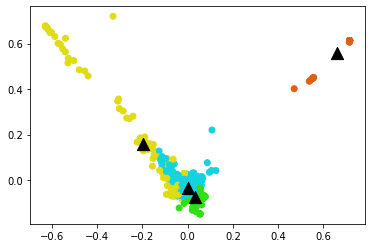

In [69]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()
